In [1]:
import pickle
from gensim.models.wrappers import LdaMallet
from gensim.corpora.dictionary import Dictionary
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
os.chdir("/home/victor/unb/new_discursos/src")
os.getcwd()

'/home/victor/unb/new_discursos/src'

In [3]:
lda = LdaMallet.load("data/models/lda_model_50_stem_it_5000/model")

In [4]:
corpus = pickle.load(open("data/corpus.pickle", "rb"))
dictionary = pickle.load(open("data/dictionary.pickle", "rb"))

In [5]:
len(corpus)

74981

In [6]:
[
    (dictionary[id], freq)
    for id, freq in corpus[0]
]

[('abencoe', 1),
 ('abraco', 1),
 ('abrancando', 1),
 ('abril', 1),
 ('acabar', 1),
 ('acatar', 1),
 ('acompanhar', 4),
 ('aconteceu', 3),
 ('acordo', 1),
 ('acredito', 3),
 ('adefal', 1),
 ('adequado', 1),
 ('adianta', 2),
 ('adiar', 1),
 ('agiganta', 1),
 ('agosto', 1),
 ('agradeco', 3),
 ('agravamento', 1),
 ('ajudar', 2),
 ('alegria', 2),
 ('alias', 1),
 ('alma', 1),
 ('alteracao', 1),
 ('alterar', 1),
 ('amarela', 1),
 ('amigo', 2),
 ('amizade', 1),
 ('ampla', 2),
 ('analise', 2),
 ('anonimos', 1),
 ('anos', 6),
 ('ansiosos', 1),
 ('aparece', 1),
 ('apelo', 1),
 ('aperfeicoamento', 1),
 ('apoiar', 1),
 ('aposentados', 2),
 ('apresentar', 2),
 ('aprovacao', 4),
 ('aprovado', 10),
 ('aquarta', 1),
 ('argumentos', 1),
 ('articular', 1),
 ('assessor', 1),
 ('assessoria', 2),
 ('assistindo', 2),
 ('assumir', 1),
 ('assunto', 4),
 ('atender', 2),
 ('atentai', 1),
 ('atitude', 1),
 ('atitudesenador', 1),
 ('atividade', 2),
 ('atual', 1),
 ('audiencias', 4),
 ('ausencia', 1),
 ('autista',

In [7]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if dictionary[idx] in dict_corpus:
      dict_corpus[dictionary[idx]] += freq
    else:
       dict_corpus[dictionary[idx]] = freq
       

In [28]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])


In [33]:
dict_df.sort_values("freq", ascending=False).head(50)

,freq
brasil,637991
governo,431506
pais,274715
trabalho,249621
federal,219777
publico,209508
politica,202300
anos,183258
nacional,172834
casa,164221


In [36]:
dict_df.sort_values("freq", ascending=True).head(20)

,freq
vozjunto,1
pandeleimon,1
ignatios,1
diaseja,1
maudesenvolvimento,1
possibilitand,1
assessorouse,1
agarrouo,1
rebaixaramno,1
orienteocidente,1


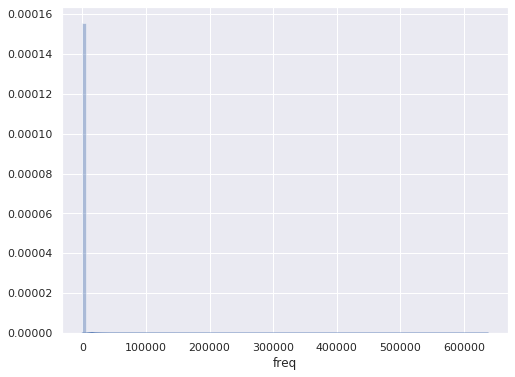

In [47]:
plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

In [54]:

texts = pickle.load(open("data/discursos_preproc.pickle", "rb"))
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=30, no_above=0.6)
corpus = [dictionary.doc2bow(t) for t in texts]

In [55]:
dict_corpus_2 = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if dictionary[idx] in dict_corpus_2:
      dict_corpus_2[dictionary[idx]] += freq
    else:
       dict_corpus_2[dictionary[idx]] = freq
       

In [56]:
dict_df = pd.DataFrame.from_dict(dict_corpus_2, orient='index', columns=['freq'])

In [57]:
dict_df.sort_values("freq", ascending=False).head(50)

,freq
economia,157159
pessoas,151759
projeto,143414
estados,129807
mundo,118141
ministro,116123
social,112930
desenvolvimento,110369
partido,101953
vida,101928


In [58]:
dict_df.sort_values("freq", ascending=True).head(20)

,freq
reconduzilo,30
recolocalo,30
mandouo,30
publicouse,30
perguntavame,30
entendessemos,30
sarcastico,30
unindose,30
danifica,30
comunicarlhe,30
